In [12]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9

# Статистика

> __Статистика (statistic)__ - любая вычислимая функция из выборки данных $X = x_1, x_2, \ldots, x_n, \ldots, x_N$. При этом физики нередко могут называть статистикой параметризированные функции от выборки данных.

Примерами статистик могут быть:
* выборочный r-й момент
$$
m_r = \frac{1}{N} \sum_{n=1}^{N} x_n^r
$$
* выборочное среднее
$$
\bar{x} = \frac{1}{N} \sum_{n=1}^{N} x_n
$$
* Несмещенная выборочная дисперсия
$$
s^2 = \frac{\sum_{n=1}^{N} (x_n - \hat{x})^2}{N - 1}
$$
* $\chi^2$
* другие

# Пример

Рассмотрим поведение выборочного среднего

[2.04814835 5.30507036 5.48174557 4.92078924 3.72622522]
Mean =  5.0296126435050805
Sigma2 =  2.0140381064954953


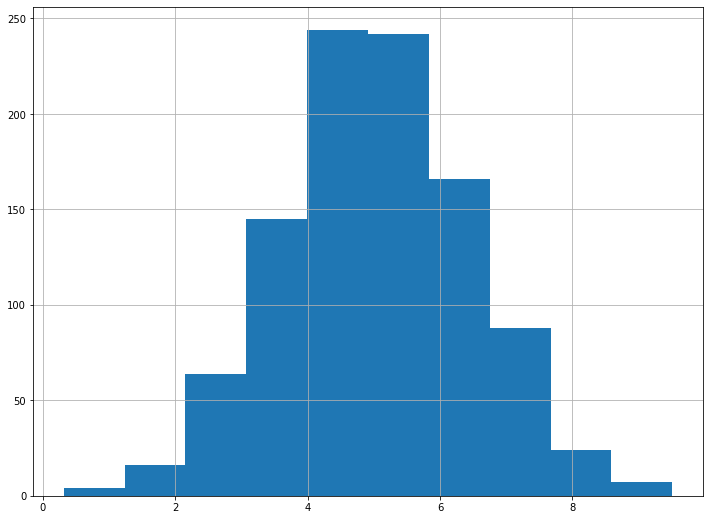

In [19]:
from scipy.stats import norm, uniform

mean = 5
sigma2 = 2

# Здесь второй параметр - это стандартное отклонение, а не дисперсия
pdf = norm(mean, np.sqrt(sigma2))
#pdf = uniform()

samples = pdf.rvs(size=1000)
print(samples[:5])

# считаем выборочное среднее и выборочную дисперсию
print("Mean = ", samples.mean())
print("Sigma2 = ", samples.var())

# Посмотрим на саму гистограмму случайной величины
plt.grid()
plt.hist(samples, bins=10);

Теперь будем считать выборочного среднее на разных выборках из заданного распределения

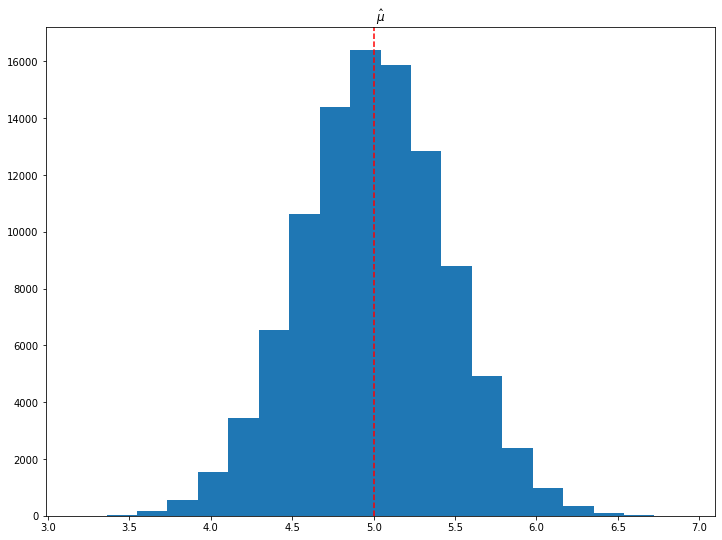

[4.82190829 5.01591738 4.82696891 4.73665696 4.11953373]
E[mu] = 4.999078144430373


In [20]:
# Попробуем посчитать выборочное среднее  множество раз

samples = pdf.rvs(size=(10, 100000))
means = samples.mean(axis=0)

plt.title("$\hat{\mu}$")
plt.axvline(mean, c='r', ls='--')
plt.hist(means, bins=20)

plt.show()

print(means[:5])
print("E[mu] =", means.mean())

Мы отчетливо видим, что выборочное среднее - это случайная величина, более того, мы можем даже предположить, что она распределена по нормальному закону.

> Почему?

## Оценка параметров распределений

На практике, вам в лучшем случае известно только семейство функций для распределения. Параметры же распредедения для вас будут не известны и их нужно как-то найти. 

Большинство стандартных распределений параметризированы 1 или 2 параметрами. На практике, придется работать с распределениями с достаточно большим числом параметров.

Чтобы оценить значения параметров, обычно вводят функцию оценки этих параметров, которая является функцией данных

$$
\hat{\vec{\theta}} = t(\mathbf{X})
$$

Результат данной функции также будет случайной величиной.

Способов построения данной функций довольно много, и у каждого есть свои преимущества и недостатки. К ним можно отнести метод максимального правдоподобия, методы машинного обучение и т.д.

## Правдоподобие

Обычно, мы можем представить один исход эксперимента, как набор случайных величин $\vec{x} = x_1, \ldots, x_K$. Здесь $\vec{x}$ - обозначает событие, которые описывается несколькими числовыми характеристиками (возможно взаимосвязанными), например: $p_T$ и заряд.

Распределение для $\vec{x}$ обычно учитывает множество эффектов: теорию, ошибку инструмента и прочее. Эти эффекты учитываются через параметры $\vec{\theta}$ этого распределения, которые изначально обычно неизвестны. Такую функцию плотности вероятности называют правдоподобием

$$
L(\vec{\theta}|\vec{x}) = P(\vec{x} | \vec{\theta}) = f(\vec{x} | \vec{\theta})
$$

Она показывает вероятность получения данного события $\vec{x}$ при заданных значениях параметров $\vec{\theta}$. 

Если наш эксперимент состоит из нескольких последовательных __независимых__ исходов $\mathbf{X} = \vec{x}_1, \ldots, \vec{x}_N$, распределенных по одному и тому же закону, то мы легко можем записать функцию правдоподобия для этой последовательности:

$$
L(\vec{\theta}|\mathbf{X}) =  \prod_n P(\vec{x}_n | \vec{\theta})
$$

То есть, фактически, функция правдоподобия показывает вероятность получить наши данные исходя из предположения, что эти данные получены из распределения $L(\vec{\theta}|\mathbf{X})$.

Часто удобно работать с логарифмом функции правдоподобия

$$
\mathcal{L}(\vec{\theta}|\mathbf{X}) = \ln L(\vec{\theta}|\vec{x}) = \sum_n \ln P(\vec{x}_n | \vec{\theta})
$$

## Байесов вывод

Функция правдоподобия идеально вписывается в теорему Байесса. В этом случае, мы считаем параметры распределения случайными величинами с некоторыми априорными вероятностями $P(\vec{\theta}) = \pi(\vec{\theta})$. Тогда сразу можем записать апостериорную вероятность для параметров

$$
P(\vec{\theta} | \mathbf{X}) = \frac{P(X|\theta)\pi(\theta)}{ P(X)} = \frac{ L(\vec{\theta} | \mathbf{X} ) \pi(\vec{\theta}) }{
\int L(\vec{\theta} | \mathbf{X} ) \pi(\vec{\theta}) \, d\vec{\theta}
}
$$

Если априорные вероятности параметров независимы, то $\pi(\vec{\theta}) = \pi_1(\theta_1)\cdot \ldots \cdot \pi_K(\theta_K)$. 

В априорную вероятноятность можно закладывать все, что мы знаем о значении данного параметра. Например, параметр может быть только больше нуля:

$$
\pi(\theta) = 
\left\{
\begin{align}
1,&\,\,\,\,\, \theta \ge 0
\\
0,&\,\,\,\,\, \theta < 0
\end{align}
\right.
$$

Так как знаменатель является константой и не зависит от параметров модели, его можно не писать, а в конце просто вывести из условия нормировки

$$
P(\vec{\theta} | \mathbf{X}) \sim L(\vec{\theta} | \mathbf{X} ) \pi(\vec{\theta})
$$

Отлично, но как же нам искать значение параметров? У нас есть функция распределения для всех возможных значений параметров, а следовательно, мы можем найти наиболее вероятные значения параметров (это максимум апостериорной функции распределения) и даже построить доверительный интервал.


Интересной особенностью теоремы Байса можно отметить, что мы можем факторизовать априорную вероятность и правдоподобие. Как пример, если мы разобьем последовательность событий $\mathbf{X}$ на три группы $\mathbf{X}_1$, $\mathbf{X}_2$ и $\mathbf{X}_3$, то мы можем записать это как

$$
P(\vec{\theta}|\mathbf{X}) \propto L(\vec{\theta} | \mathbf{X} ) \pi(\vec{\theta})
\\ \Rightarrow \\
P(\vec{\theta}|\mathbf{X}) \propto L(\vec{\theta} | \mathbf{X_1} )  L(\vec{\theta} | \mathbf{X_2} )  L(\vec{\theta} | \mathbf{X_3} ) \pi(\vec{\theta})
$$

Мы можем расписать правдоподобие в произведение, предполагая независимость каждого события. Здесь если присмотреться, то можно заметить, что

$$
P(\vec{\theta}|\mathbf{X}_1) \propto L(\vec{\theta} | \mathbf{X}_1 ) \pi(\vec{\theta})
\\
P(\vec{\theta}|\mathbf{X}_2, \mathbf{X}_1) \propto L(\vec{\theta} | \mathbf{X}_2 ) P(\vec{\theta}|\mathbf{X}_1)
\\
P(\vec{\theta}|\mathbf{X}_3, \mathbf{X}_2, \mathbf{X}_1) \propto L(\vec{\theta} | \mathbf{X}_3 ) P(\vec{\theta}|\mathbf{X}_2, \mathbf{X}_1)
$$

Таким образом, добавляя новые измерения, мы меняем апостериорную информацию, исходя из полученного "опыта".

## Пример оценки по Байесу

Рассмотрим простой пример:
 > Пусть нас есть последовательность измерений $x_1, x_2, \ldots, x_N$, для которой мы предполгаем функцию правдоподобия в виде нормального закона с неизвестным $\mu$ и $\sigma^2$. Априорные вероятности $\pi_\mu(\mu) = const$ и $\pi_\sigma(\sigma^2) = const$.

Сразу же запишем функцию правдоподобия 

$$
L(\mu | \mathbf{X}) = \prod_n \mathcal{N}(x_n | \mu, \sigma^2)
$$

и затем апостериорную вероятность

$$
P(\mu | \mathbf{X}) \propto \prod_n \mathcal{N}(x_n | \mu, \sigma^2) \pi_\mu(\mu) \pi_\sigma(\sigma^2) \propto \prod_n \mathcal{N}(x_n | \mu, \sigma^2)
$$

Найдем самые вероятные значения. Для этого просто найдем производную и приравняем к нулю. Откуда

$$
\hat{\mu} = \frac{1}{N} \sum_n x_n
\\
\hat{\sigma}^2 = \frac{1}{N} \sum_n (x_n - \hat{\mu})^2 
= \frac{1}{N} \sum_n x_n^2 - \hat{\mu}^2
$$
что совпадает с выборочным средним и выборочной дисперсией.

Посмотрим теперь на более явный вид распределения по $\mu$ и $\sigma^2$

$$
P(\mu, \sigma^2 | \mathbf{X}) \propto \frac{1}{(2\pi\sigma^2)^{N/2}} \exp\left[
-N \frac{
    \hat{\sigma}^2 + (\mu - \hat{\mu})^2
}{
    2\sigma^2
}
\right]
$$

Тут видно, что если фиксировать $\sigma^2$, то $\mu \sim \mathcal{N}\left(\hat{\mu}, \frac{\sigma^2}{N}\right)$. Рассмотрим поведение $\mu$ в окрестности максимума апостериорной вероятности ($\mu = \hat{\mu}$ и $\sigma^2 = \hat{\sigma}^2$)

hat(mean) = 4.839599679084903
hat(sigma2) = 1.9761880469140463


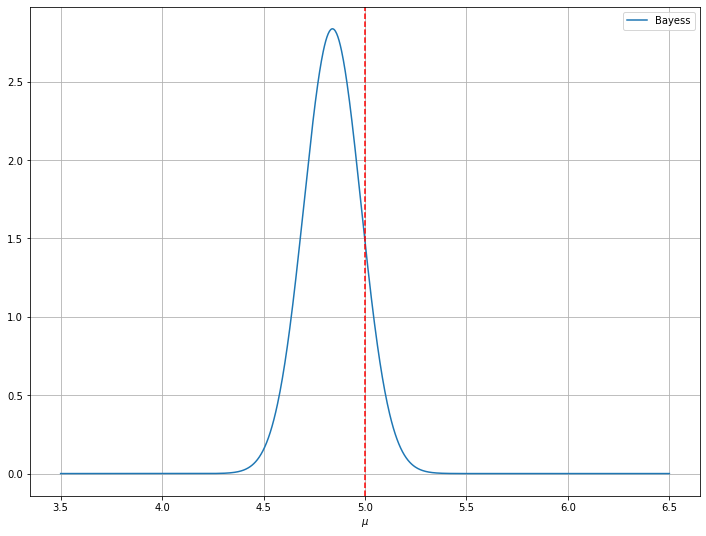

In [23]:
# Построим график распределения по mu
from scipy.stats import norm

N = 100
mean = 5
sigma2 = 2

samples = pdf.rvs(size=N)
h_mean = samples.mean()
h_sigma2 = samples.var()

h_mean_sigma2 = h_sigma2 / N
print("hat(mean) =", h_mean)
print("hat(sigma2) =", h_sigma2)

x = np.linspace(3.5, 6.5, 1000)
y = norm(h_mean, np.sqrt(h_mean_sigma2)).pdf(x)

plt.plot(x, y, label="Bayess")
plt.xlabel("$\mu$")
plt.axvline(mean, ls='--', c='r')
plt.grid()
plt.legend()
plt.show()

## Доверительный интервал по Байесу

Апостериорное распределение для параметров распределения отражает нашу степень уверенности в каком-либо конкретном значении параметра при наличии у нас какого-то опыта или эксперимента. Из этого распределения мы можем построить интервал и указать вероятность попадания параметра в этот интервал.

$$
P(\theta_b \le \theta \le \theta_u) = \int_{\theta_b}^{\theta_u} P(\theta|\mathbf{X}) \, d\theta = 1 - \alpha
$$

где $\alpha$ - уровень доверия, указывает на сколько сильно нам хотелось бы ошибаться. 

Такой интервал называют доверительным. В англоязычной литературе доверительный интервал по Байесу называют __credible interval__. 

Пусть $\alpha = 0.317$, что соответсвует вероятности в $1\sigma$ или 68.3%. Покажем как выглядит этот интервал

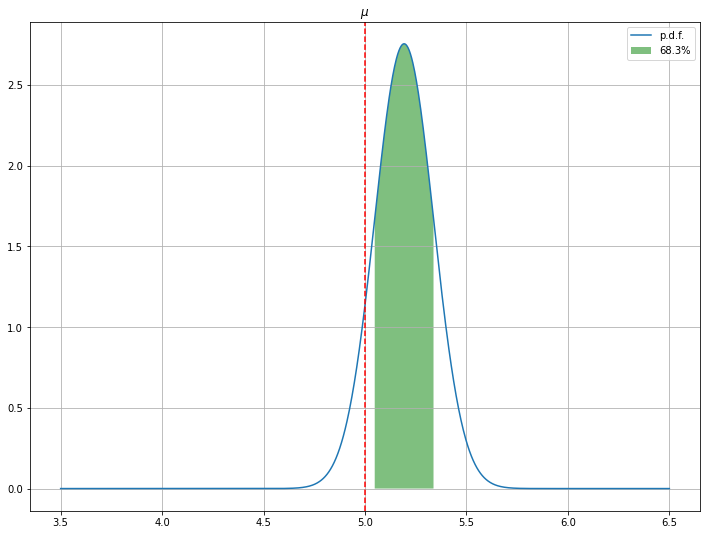

In [10]:
x1s = np.linspace(h_mean-np.sqrt(h_mean_sigma2), h_mean + np.sqrt(h_mean_sigma2), 1000)

plt.title("$\mu$")

plt.fill(np.concatenate([x1s, x1s[::-1]]),
         np.concatenate([norm.pdf(x1s, h_mean, np.sqrt(h_mean_sigma2)), np.zeros(x1s.shape)]),
         alpha=.5, fc='g', label="68.3%")

plt.plot(x, norm.pdf(x, h_mean, np.sqrt(h_mean_sigma2)), label="p.d.f.")
plt.axvline(5, c='r', ls='--')
plt.grid()
plt.legend()
plt.show()

Хм, тут мы должны задумать, ведь ничего не мешает выбрать другие пределы интегрирования.

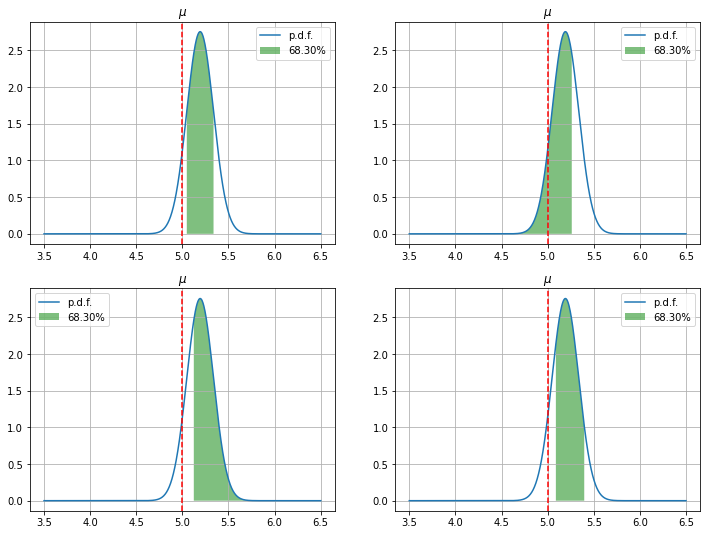

In [11]:
f = norm(h_mean, np.sqrt(h_mean_sigma2))
alpha = 0.317

plt.subplot(221)
plt.title("$\mu$")

x1s = np.linspace(f.ppf(alpha/2), f.ppf(1-alpha/2), 1000)
plt.fill(np.concatenate([x1s, x1s[::-1]]),
         np.concatenate([f.pdf(x1s), np.zeros(x1s.shape)]),
         alpha=.5, fc='g', label="%.2f%%" % ( (1-alpha) * 100))

plt.plot(x, f.pdf(x), label="p.d.f.")
plt.axvline(5, c='r', ls='--')
plt.grid()
plt.legend()


plt.subplot(222)
plt.title("$\mu$")

x1s = np.linspace(x.min(), f.ppf(1 - alpha), 1000)
plt.fill(np.concatenate([x1s, x1s[::-1]]),
         np.concatenate([f.pdf(x1s), np.zeros(x1s.shape)]),
         alpha=.5, fc='g', label="%.2f%%" % ( (1-alpha) * 100))

plt.plot(x, f.pdf(x), label="p.d.f.")
plt.axvline(5, c='r', ls='--')
plt.grid()
plt.legend()

plt.subplot(223)
plt.title("$\mu$")

x1s = np.linspace(f.ppf(alpha), x.max(), 1000)
plt.fill(np.concatenate([x1s, x1s[::-1]]),
         np.concatenate([f.pdf(x1s), np.zeros(x1s.shape)]),
         alpha=.5, fc='g', label="%.2f%%" % ( (1-alpha) * 100))

plt.plot(x, f.pdf(x), label="p.d.f.")
plt.axvline(5, c='r', ls='--')
plt.grid()
plt.legend()

plt.subplot(224)
plt.title("$\mu$")

x1s = np.linspace(f.ppf(3*alpha/4), f.ppf(1-alpha/4), 1000)
plt.fill(np.concatenate([x1s, x1s[::-1]]),
         np.concatenate([f.pdf(x1s), np.zeros(x1s.shape)]),
         alpha=.5, fc='g', label="%.2f%%" % ( (1-alpha) * 100))

plt.plot(x, f.pdf(x), label="p.d.f.")
plt.axvline(5, c='r', ls='--')
plt.grid()
plt.legend()

plt.show()

Вероятность попадания в этот интервал везде одна и та же. Какой из них выбрать? Обычно выбирают такой интервал, чтобы вероятности внутри интервала были больше вероятностей вне интервала (обычно это соответствует наименьшей ширине интервала). Ниже представлены примеры наиболее часто используемые формы для доверительного интервала

$$
\int_{-\infty}^{\theta_u} P(\theta|\mathbf{X}) \, d\theta = 1 - \alpha
\\
\int_{\theta_l}^{\infty} P(\theta|\mathbf{X}) \, d\theta = 1 - \alpha
\\
\int_{\theta_0 - \delta}^{\theta_0 + \delta} P(\theta|\mathbf{X}) \, d\theta = 1 - \alpha
\\
\int_{-\infty}^{\theta_l} P(\theta|\mathbf{X}) \, d\theta = \frac{\alpha}{2}, \int_{\theta_u}^{\infty} P(\theta|\mathbf{X}) \, d\theta = \frac{\alpha}{2}
$$

Если $x$ распределен по нормальному закону (или симметричное распределение), то кратко доверительный интервал записывают как
$$x \pm \sigma_x,$$

Если интервал не симметричен
$$x_{-\delta_2}^{+\delta_1}$$


И еще раз: __доверительный интервал по Байесу показывает нашу степень в веры в то, что данный параметр принимает некое истинное значение в указанном интервале с определенной вероятностью. Формально, все значения внутри интервала подходят.__

Вид интервала зависит от выбора априорной функции распределения!